In [3]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from jupyterthemes import jtplot

<Figure size 3840x3360 with 0 Axes>

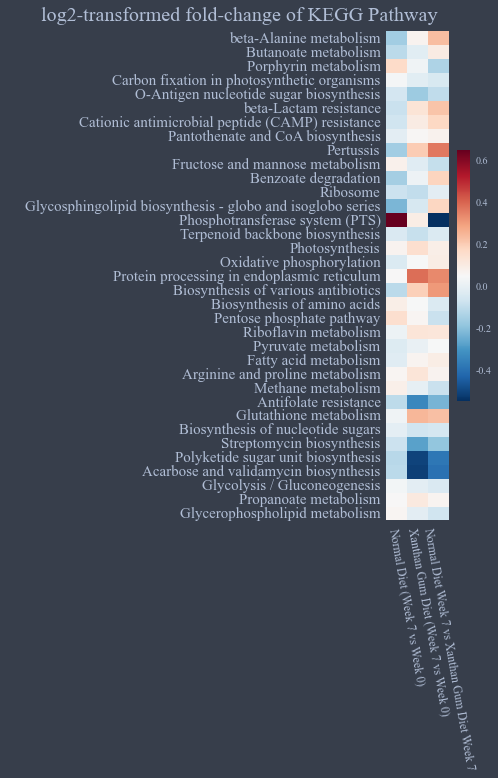

In [4]:
kegg = pd.read_excel(r'D:\Work\分析项目\wxy\正式结果整理\16S+宏基因组\MAG\lefse\KEGG\ND7XG7\lefse_log2FC.xlsx',
                     header=0,index_col=0)

keggfc = pd.DataFrame(kegg).set_index('PathwayDetail')
keggfc = pd.DataFrame(keggfc, columns=["ND7/ND0", "XG7/ND0", "XG7/ND7"])
keggfc

jtplot.style(theme='onedork') #选择一个绘图主题
plt.figure(dpi=600)

# 调整图的大小
plt.figure(figsize=(1.5, 9))  # 宽 高

# 调整全局字体为新罗马
plt.rc('font', family='Times New Roman')

"""
x:标题相对于绘制的图形横轴的位置,0则表示最左边。
y:标题相对于绘制的图形纵轴的位置,0则表示最下边"""
plt.title("log2-transformed fold-change of KEGG Pathway", fontsize=20, loc='left', x=-5.5,y=1.01)  # 标题，并设定字号大小、位置

"""设置坐标轴刻度的字体大小"""
plt.xticks(size=12)
plt.yticks(size=15)

fig = sns.heatmap(keggfc, annot=False,
                  # standard_scale：int or None, optional，是否 Min-Max 标准化行 (0) 或列 (1)。
                  xticklabels=True, yticklabels=True, square=False, cbar = True,
                  # (left, bottom, width, height)
                  cmap="RdBu_r",
                  cbar_kws={'label': '',  # color bar的名称
                            'orientation': 'vertical',  # color bar的方向设置，默认为'vertical'，可水平显示'horizontal'
                            # "ticks":np.arange(4.5, 8, 0.5),  # color bar中刻度值范围和间隔
                            "format": "%.1f",  # 格式化输出color bar中刻度值
                            "pad": 0.1,  # color bar与热图之间距离，距离变大热图会被压缩)  # annot是否显示数值  square 绘图区是否是正方形, cbar设置标尺
                            "shrink": 2
                            }

                  )
# 添加坐标轴标签
# fig.set_xlabel("X-Axis", fontsize=15)
fig.set_ylabel(" ", fontsize=15)
# 调整colorbar的label大小
cbar = fig.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)

# 旋转轴刻度
fig.set_xticklabels(fig.get_xticklabels(),rotation = -80)
# 刻度标记放置在图像底部
fig.xaxis.tick_bottom()
# 自定义刻度值的内容和位置
plt.xticks([1,2,3],['Normal Diet (Week 7 vs Week 0)','Xanthan Gum Diet (Week 7 vs Week 0)','Normal Diet Week 7 vs Xanthan Gum Diet Week 7'])
# 调整哪个坐标轴显示刻度线
plt.tick_params(top=False,bottom=False,left=False,right=False)


# plt.savefig(r'D:\Work\分析项目\wxy\正式结果整理\16S+宏基因组\MAG\KEGG+CAZY相对丰度log2FC\kegg\log2FC_RelativeAbun.tiff',dpi=500, bbox_inches='tight')